In [66]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)
city= city.drop_duplicates('city', keep = 'first')
# Combine the data into a single dataset
combine=city.merge(ride, on='city')
# Display the data table for preview

In [67]:
combine.tail()

,city,driver_count,type,date,fare,ride_id
2370,Jessicaport,1,Rural,2018-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2018-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2018-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2018-03-27 21:07:16,11.87,170351888128
2374,South Saramouth,7,Rural,2018-04-12 18:11:50,57.23,5081198789583


## Bubble Plot of Ride Sharing Data

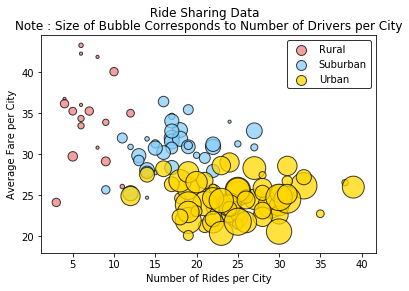

<Figure size 432x288 with 0 Axes>

In [68]:
# Obtain the x and y coordinates for each of the three city types
#group be city name

by_city = combine.groupby('city')

#fare by city
avg_fare = by_city.mean()['fare']

#rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color Dictionary 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle(' Ride Sharing Data')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)


plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[2]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[0]._sizes = [100]
#print scatter plot
plt.show()

plt.savefig('../Pyber/data/pyber plot(1).png')



## Total Fares by City Type

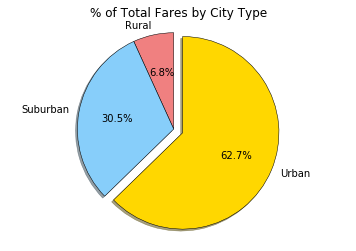

In [69]:
#group by type to be used by all pie charts
by_type = combine.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

In [70]:
# Show Figure
plt.show()
plt.savefig('../Pyber/data/pyber plot(2).png')

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

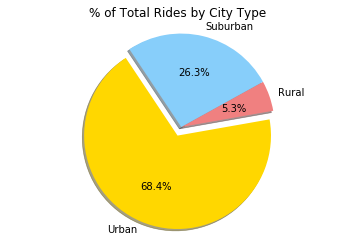

<Figure size 432x288 with 0 Axes>

In [71]:
# number of ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 10, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .6, 'edgecolor': 'none'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()
plt.savefig('../Pyber/data/pyber plot(3).png')

## Total Drivers by City Type

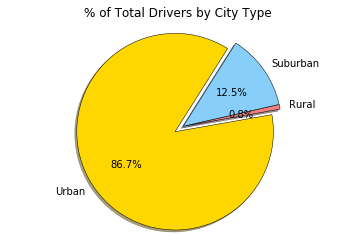

In [72]:
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 10, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

In [73]:
plt.savefig('../Pyber/data/pyber plot(4).png')

<Figure size 432x288 with 0 Axes>

Analysis:
based on the scatter plot, there is a correlation between Number of Rides per City and Average Fare per City. Urban area has more ride shares with cheaper average price while rural has the opposite. 


However,even though rural cities had the highest average fare per city, the rural cities had the smallest segment of th total fares by city pie chart at 5.3%
Urban cities takes over 86.7% of total drivers, so it is obviouly more comeptitve to work as ride share driver in urban cities.
